In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

In [3]:
def get_plot(data, mode = 'MLS'): 
    if mode == 'ILS':
        plt.plot(data[0], label = 'Mutation 0.01')
        plt.plot(data[1], label = 'Mutation 0.03')
        plt.plot(data[2], label = 'Mutation 0.05')
        plt.show()
        
        plt.boxplot(data)
        plt.xticks([1,2,3], ['ILS 0.01','ILS 0.03','ILS 0.05'])
        plt.show()

    if mode == 'MLS':
        plt.plot(data)
        plt.show()

        plt.boxplot(data)
        plt.xticks([1], [mode])
        plt.show()    

    if mode == 'GLS':
        #plt.plot(data[0], label = 'Population 20')
        plt.plot(data, label = 'Population 50')
        plt.show()

        plt.boxplot(data)
        #plt.xticks([1, 2], ['GLS20', 'GLS50'])
        plt.show()

    if mode == 'ALL':
        plt.boxplot(data)
        plt.xticks([1,2,3,4,5], ['MLS','ILS 0.01','ILS 0.03','ILS 0.05','GLS'])#'GLS20','GLS50'])
        plt.show()

def get_gls_data(data):
    gls_data_cutstate = []
    # Convert the list of strings to numeric values
    for cut_value in data:
        cut_value = cut_value.replace(']', '[').split('[')
        if len(cut_value) > 0:
            gls_data_cutstate.append(int(cut_value[1]))
    return gls_data_cutstate

def get_timeout_data(data):
    timeout_data = []
    value = []
    for i in data:
        cut_value = i.replace('[',',').replace(']',',').split(',')
        for j in cut_value:
            if len(j) > 0:
                value.append(int(j))
        timeout_data.append(np.mean(value))
    return timeout_data

In [5]:
# Read data
mls_data = pd.read_csv('data/mls/mls_with_fm.csv')
mls_performance = pd.read_csv('data/mls/mls_with_fm_performance.csv')
ils_data_005 = pd.read_csv('data/ils/ils_with_fm_0.05.csv')
ils_performance_005 = pd.read_csv('data/ils/ils_with_fm_0.05_performance.csv')
gls_data = pd.read_csv('data/gls/gls_with_fm.csv')
gls_performance = pd.read_csv('data/gls/gls_with_fm_performance.csv')
### TIMEOUT DATA###
mls_timeout_1 = pd.read_csv('data/mls/mls_with_fm_time_limit_60.csv')
ils_timeout_1 = pd.read_csv('data/ils/ils_with_fm_0.05_limit_60.csv')
gls_timeout_1 = pd.read_csv('data/gls/gls_with_fm_limit_60.csv')


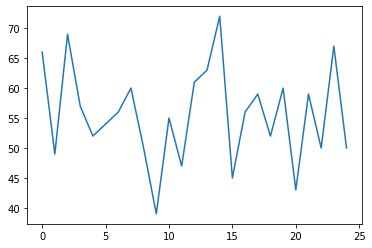

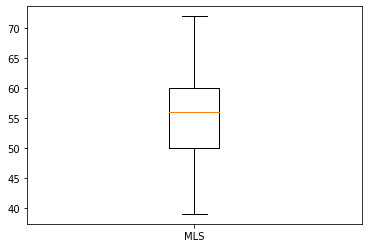

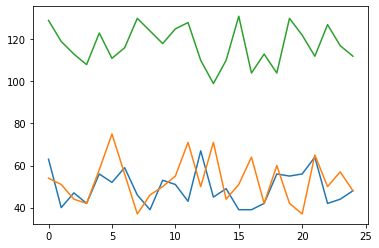

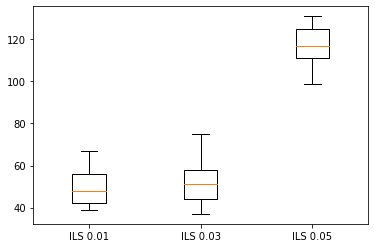

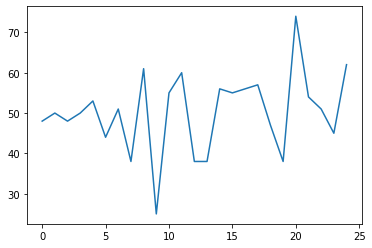

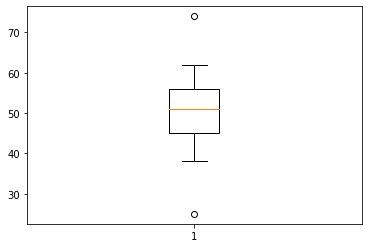

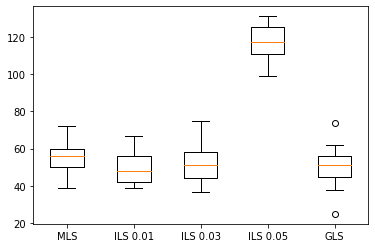

In [6]:
#### CUTSTATE ####
data_001 = list(ils_data_005['cutstate'][:25])
data_003 = list(ils_data_005['cutstate'][25:50])
data_005 = list(ils_data_005['cutstate'][50:])
gls_data_cutstate = get_gls_data(gls_data['Cutstate'])

average_mls_data = np.mean(mls_data['cutstate'])
average_ils_001 = np.mean(data_001)
average_ils_003 = np.mean(data_003)
average_ils_005 = np.mean(data_005)
average_gls_data = np.mean(gls_data_cutstate)

get_plot(mls_data['cutstate'], mode = 'MLS')
get_plot([data_001, data_003, data_005], mode = 'ILS')
get_plot(gls_data_cutstate, mode = 'GLS')
get_plot([mls_data['cutstate'], data_001, data_003, data_005, gls_data_cutstate], mode = 'ALL')

In [8]:
 # Wilcoxon test
wilcoxon_mls_gls = wilcoxon(mls_data['cutstate'], gls_data_cutstate)
wilcoxon_mls_ils001 = wilcoxon(mls_data['cutstate'], data_001)
wilcoxon_mls_ils003 = wilcoxon(mls_data['cutstate'], data_003)
wilcoxon_mls_ils005 = wilcoxon(mls_data['cutstate'], data_005)
wilcoxon_gls_ils001 = wilcoxon(gls_data_cutstate, data_001)
wilcoxon_gls_ils003 = wilcoxon(gls_data_cutstate, data_003)
wilcoxon_gls_ils005 = wilcoxon(gls_data_cutstate, data_005)
print(f'MLS and GLS: {wilcoxon_mls_gls}')
print(f'MLS and ILS001: {wilcoxon_mls_ils001}')
print(f'MLS and ILS003: {wilcoxon_mls_ils003}')
print(f'MLS and ILS005: {wilcoxon_mls_ils005}')
print(f'GLS and ILS001: {wilcoxon_gls_ils001}')
print(f'GLS and ILS003: {wilcoxon_gls_ils003}')
print(f'GLS and ILS005: {wilcoxon_gls_ils005}')

MLS and GLS: WilcoxonResult(statistic=74.5, pvalue=0.05326049433795275)
MLS and ILS001: WilcoxonResult(statistic=71.0, pvalue=0.013744271367923175)
MLS and ILS003: WilcoxonResult(statistic=95.5, pvalue=0.31369569189246393)
MLS and ILS005: WilcoxonResult(statistic=0.0, pvalue=1.2168262804861416e-05)
GLS and ILS001: WilcoxonResult(statistic=144.5, pvalue=0.6278598401107219)
GLS and ILS003: WilcoxonResult(statistic=120.5, pvalue=0.3989231319613875)
GLS and ILS005: WilcoxonResult(statistic=0.0, pvalue=1.2212534653800161e-05)


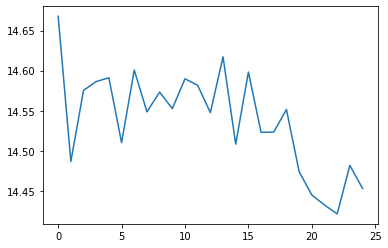

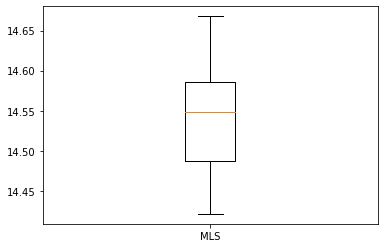

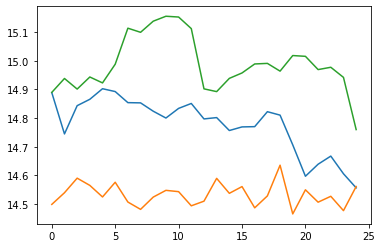

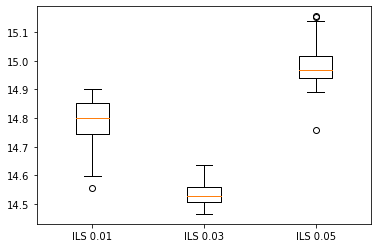

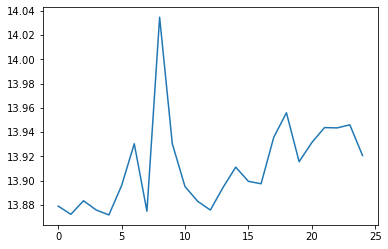

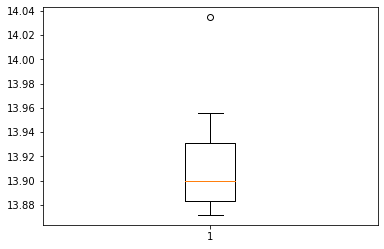

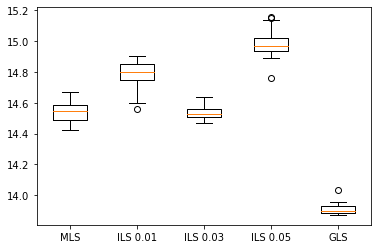

In [10]:
#### CPU PERFORMANCE ####
mls_performance_minutes = mls_performance['Execution Time'] / 60
performance_001 = list(ils_performance_005['Execution Time'][:25] / 60)
performance_003 = list(ils_performance_005['Execution Time'][25:50] / 60)
performance_005 = list(ils_performance_005['Execution Time'][50:75] / 60)
gls_performance_minutes = gls_performance['Execution Time'] / 60

average_mls_performance = np.mean(mls_performance_minutes)
average_ils_performance001 = np.mean(performance_001)
average_ils_performance003 = np.mean(performance_003)
average_ils_performance005 = np.mean(performance_005)
average_gls_performance = np.mean(gls_performance_minutes)

get_plot(mls_performance_minutes, mode = 'MLS')
get_plot([performance_001, performance_003, performance_005], mode = 'ILS')
get_plot(gls_performance_minutes, mode = 'GLS')
get_plot([mls_performance_minutes, performance_001, performance_003, performance_005, gls_performance_minutes], mode = 'ALL')

In [11]:
# Wilcoxon test
wilcoxon_performance_mls_gls = wilcoxon(mls_performance_minutes, gls_performance_minutes)
wilcoxon_performance_mls_ils001 = wilcoxon(mls_performance_minutes, performance_001)
wilcoxon_performance_mls_ils003 = wilcoxon(mls_performance_minutes, performance_003)
wilcoxon_performance_mls_ils005 = wilcoxon(mls_performance_minutes, performance_005)
wilcoxon_performance_gls_ils001 = wilcoxon(gls_performance_minutes, performance_001)
wilcoxon_performance_gls_ils003 = wilcoxon(gls_performance_minutes, performance_003)
wilcoxon_performance_gls_ils005 = wilcoxon(gls_performance_minutes, performance_005)
print(f'MLS and GLS: {wilcoxon_performance_mls_gls}')
print(f'MLS and ILS001: {wilcoxon_performance_mls_ils001}')
print(f'MLS and ILS003: {wilcoxon_performance_mls_ils003}')
print(f'MLS and ILS005: {wilcoxon_performance_mls_ils005}')
print(f'GLS and ILS001: {wilcoxon_performance_gls_ils001}')
print(f'GLS and ILS003: {wilcoxon_performance_gls_ils003}')
print(f'GLS and ILS005: {wilcoxon_performance_gls_ils005}')

MLS and GLS: WilcoxonResult(statistic=0.0, pvalue=1.2290322210248409e-05)
MLS and ILS001: WilcoxonResult(statistic=0.0, pvalue=1.2290322210248409e-05)
MLS and ILS003: WilcoxonResult(statistic=152.0, pvalue=0.7775428401502809)
MLS and ILS005: WilcoxonResult(statistic=0.0, pvalue=1.2290322210248409e-05)
GLS and ILS001: WilcoxonResult(statistic=0.0, pvalue=1.2290322210248409e-05)
GLS and ILS003: WilcoxonResult(statistic=0.0, pvalue=1.2290322210248409e-05)
GLS and ILS005: WilcoxonResult(statistic=0.0, pvalue=1.2290322210248409e-05)


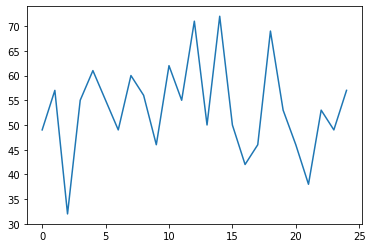

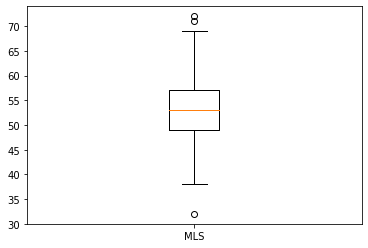

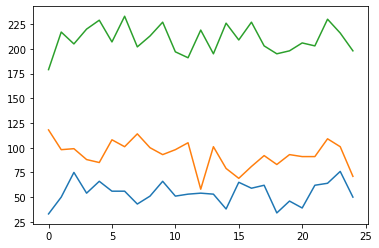

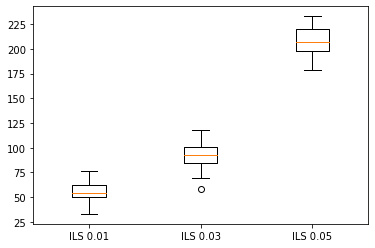

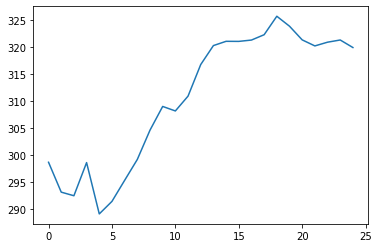

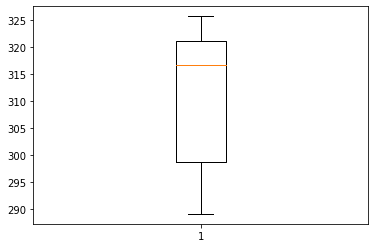

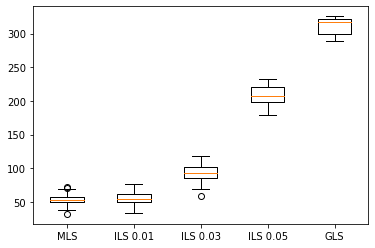

In [12]:
#### TIMEOUT ###
timeout_1_001 = list(ils_timeout_1['cutstate'][:25])
timeout_1_003 = list(ils_timeout_1['cutstate'][25:50])
timeout_1_005 = list(ils_timeout_1['cutstate'][50:])

gls_timeout_cutstate = get_timeout_data(gls_timeout_1['Cutstate'])

average_mls_timeout = np.mean(mls_timeout_1['cutstate'])
average_ils_timeout_001 = np.mean(timeout_1_001)
average_ils_timeout_003 = np.mean(timeout_1_003)
average_ils_timeout_005 = np.mean(timeout_1_005)
average_gls_timeout = np.mean(gls_timeout_cutstate)

get_plot(mls_timeout_1['cutstate'], mode = 'MLS')
get_plot([timeout_1_001, timeout_1_003, timeout_1_005], mode = 'ILS')
get_plot(gls_timeout_cutstate, mode = 'GLS')
get_plot([mls_timeout_1['cutstate'], timeout_1_001, timeout_1_003, timeout_1_005, gls_timeout_cutstate], mode = 'ALL')